In [1]:
import numpy as np
import tables
import h5py
import matplotlib.pyplot as plt

In [4]:
h1 = tables.open_file('/mnt/stage/douwei/GH2021/playground/pre-problem.h5')
EId = h1.root.PETruth[:]['EventID']
H,_, = np.histogram(EId, bins=np.arange(-0.5,2000.5,1))
vis = H/1727
h1.close()

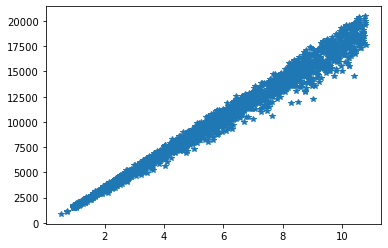

In [6]:
h0 = tables.open_file('/mnt/stage/douwei/GH2021/playground/pre-1.h5')
E = h0.root.ParticleTruth[:]['vis']
EId0 = h0.root.PETruth[:]['EventID']
H,_, = np.histogram(EId0, bins=np.arange(-0.5,2000.5,1))
plt.plot(E, H, '*')
plt.show()
h0.close()

In [7]:
opdt = np.dtype([('EventID', np.uint32), ('vis', np.float64)])
answer = np.zeros(2000, dtype=opdt)
answer['EventID'] = np.arange(2000)
answer['vis'] = vis
with h5py.File('answer.h5', 'w') as out:
    out.create_dataset('Answer', data = answer)

### final

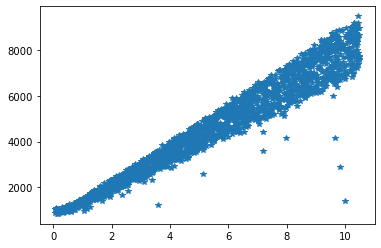

In [30]:
h0 = tables.open_file('/mnt/stage/douwei/GH2021/final/final-2.h5')
ParticleTruth = h0.root.ParticleTruth
photon_vis = ParticleTruth[:]['vis_photons']
x = ParticleTruth[:]['x']
y = ParticleTruth[:]['y']
z = ParticleTruth[:]['z']
E_vis = ParticleTruth[:]['p']
PETruth = h0.root.PETruth
EId = PETruth[:]['EventID']
PE = PETruth[:]['ChannelID']
time = PETruth[:]['PETime']
H,_, = np.histogram(EId, bins=np.arange(-0.5,2000.5,1))
plt.plot(E_vis, H, '*')
plt.show()
h0.close()

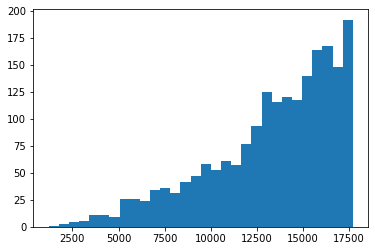

In [27]:
plt.hist(np.sqrt(x**2+y**2+z**2),bins=30)
plt.show()

(array([129., 194., 206., 207., 227., 220., 202., 191., 213., 211.]),
 array([ 0.0533319 ,  1.09757428,  2.14181667,  3.18605906,  4.23030144,
         5.27454383,  6.31878621,  7.3630286 ,  8.40727099,  9.45151337,
        10.49575576]),
 <BarContainer object of 10 artists>)

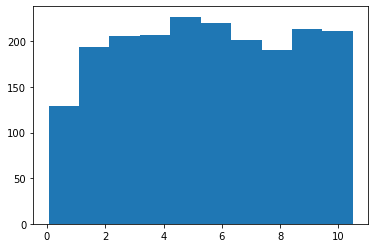

In [29]:
plt.hist(p)